# Aggregation
## About
Aggregation is a synthetic dataset that has 2 variables and contains 7 imbalanced classes that are linearly separable. Its purpose is to study resampling techniques, and their effect on classification.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

## Importing the Data

In [2]:
aggregation = pd.read_csv("datasets/Aggregation.txt", sep="\t", names=["V1", "V2", "V3"])
aggregation = aggregation.astype({"V3":"category"})
X= aggregation[["V1","V2"]]
Y= aggregation["V3"]

aggregation.head()

,V1,V2,V3
0,15.55,28.65,2
1,14.90,27.55,2
2,14.45,28.35,2
3,14.15,28.80,2
4,13.75,28.05,2


In [3]:
aggregation.describe()

,V1,V2
count,788.000000,788.000000
mean,19.566815,14.171764
std,9.922042,8.089683
min,3.350000,1.950000
25%,11.150000,7.037500
50%,18.225000,11.725000
75%,30.700000,21.962500
max,36.550000,29.150000


In [4]:
cc = aggregation["V3"].value_counts()
cc

4    273
2    170
6    130
3    102
1     45
5     34
7     34
Name: V3, dtype: int64

<BarContainer object of 7 artists>

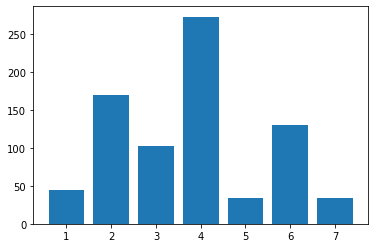

In [5]:
plt.bar(x=cc.index, height = cc)

We can see from the barplot that the classes 1,5 and 7 have significantly less elements than class 4. This can make learning harder as models will tend to classify well class number 4 and ignore other classes.

## Visualizing the data

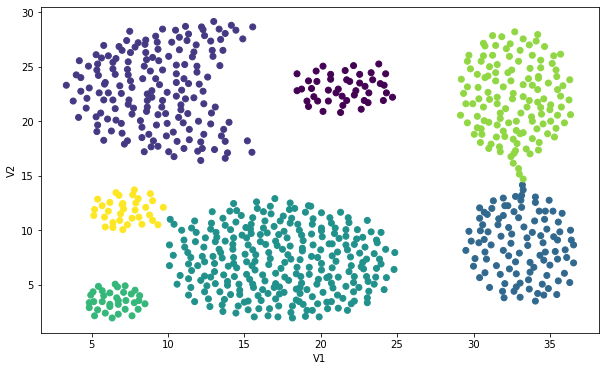

In [6]:
plt.figure(figsize=(10,6))
plt.scatter(X["V1"], X["V2"], c= Y)
plt.xlabel("V1")
plt.ylabel("V2")
plt.show()

## Normalizing

In [7]:
# Normalizing by Min/Max
X = (X-X.min())/(X.max() - X.min())

## Splitting into Train/Test

In [8]:
t_size = 0.30
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=t_size, random_state=seed)

## Rebalancing the training set SMOTE

In [9]:
sm = SMOTE()
X_resampled, y_resampled = sm.fit_resample(X_train, Y_train)

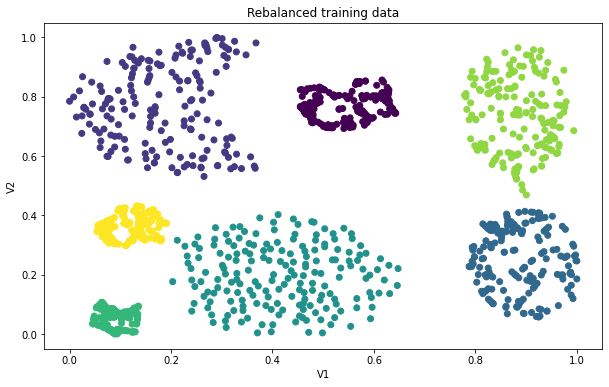

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(X_resampled["V1"], X_resampled["V2"], c=y_resampled)
plt.xlabel("V1")
plt.ylabel("V2")
plt.title("Rebalanced training data")
plt.show()

<BarContainer object of 7 artists>

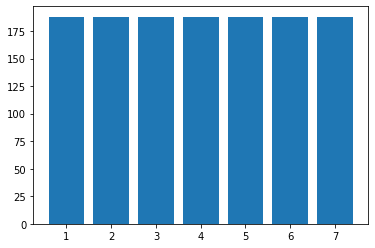

In [11]:
plt.bar(x=y_resampled.value_counts().index, height = y_resampled.value_counts())

We can see in the barplot that all the classes have now the same count within the training data.

It is important to note that the resampling is done only on the `training data` and no on the entire dataset, as doing so would make our model train on elements that are derived from the testing set. Which makes the testing data dependent and correlated to the training data. This would make the testing metrics incorrect.

# Applying Classfication Algorithms

We'll start by training a logistic regression model first on the resampled data, then on the imbalanced data. We'll then compare the results.

In [12]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

import warnings
warnings.filterwarnings('ignore')

## Logistic Regression
### On imbalanced dataset

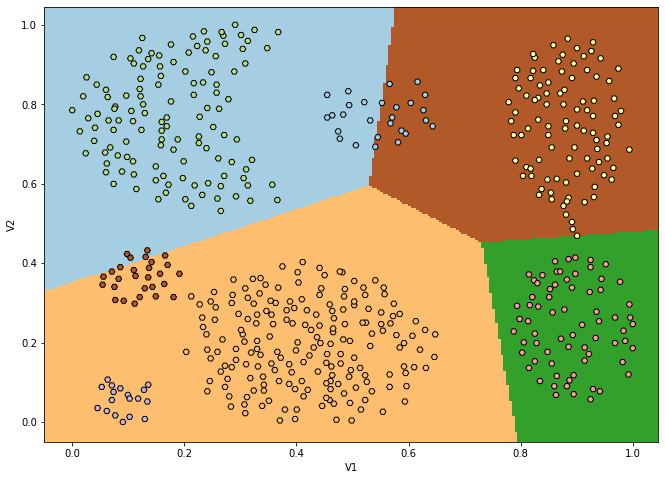

In [13]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train["V1"].min() - .05, X_train["V1"].max() + .05
y_min, y_max = X_train["V2"].min() - .05, X_train["V2"].max() + .05
h = .005  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(11, 8))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_train["V1"], X_train["V2"], c=Y_train, marker="H", edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('V1')
plt.ylabel('V2')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

### On resampled dataset

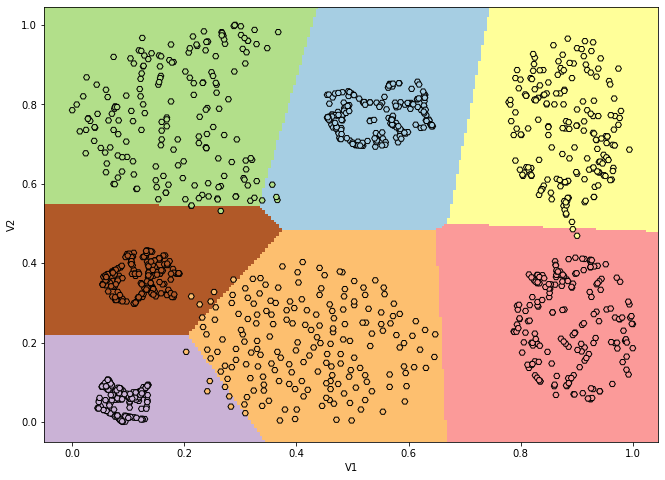

In [14]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_resampled, y_resampled)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_resampled["V1"].min() - .05, X_resampled["V1"].max() + .05
y_min, y_max = X_resampled["V2"].min() - .05, X_resampled["V2"].max() + .05
h = .005  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(11, 8))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_resampled["V1"], X_resampled["V2"], c=y_resampled, marker="H", edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('V1')
plt.ylabel('V2')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

We can see that without parametring Logistic Regression, when presented with imbalanced data, it cannot learn the separation.

But once we resample the data, we can easily separate the different classes hence the importance of resampling when dealing with imbalanced datasets.

Also note that if we set C=1e5, Logistic Regression can learn to separate the imbalanced data thanks to regularization.

## Execute many algorithms
In this part we'll try to apply and compare many different classification algorithms. We'll see how each behave on imbalanced data.

Note that we'll evaluate our models based on the f1 score, which takes into consideration data imbalance.

### Imbalanced CASE (Without rebalancing the data)

#### Cross Validation

In [15]:
num_folds = 10
seed = 7
scoring = 'f1_macro'
models_unbalanced = []
models_unbalanced.append(('LR', LogisticRegression()))
models_unbalanced.append(('LDA', LinearDiscriminantAnalysis()))
models_unbalanced.append(('QDA', QuadraticDiscriminantAnalysis()))
models_unbalanced.append(('KNN', KNeighborsClassifier()))
models_unbalanced.append(('CART', DecisionTreeClassifier()))
models_unbalanced.append(('RF', RandomForestClassifier()))
models_unbalanced.append(('NB', GaussianNB()))
models_unbalanced.append(('SVM_LIN', LinearSVC()))
models_unbalanced.append(('SVM_POLY', SVC(kernel="poly")))
models_unbalanced.append(('SVM_RBF', SVC(kernel="rbf")))
results_unbalanced = []
names_unbalanced = []
for name, model in models_unbalanced:
	kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results_unbalanced.append(cv_results)
	names_unbalanced.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.557658 (0.074594)
LDA: 0.988581 (0.014762)
QDA: 1.000000 (0.000000)
KNN: 1.000000 (0.000000)
CART: 1.000000 (0.000000)
RF: 1.000000 (0.000000)
NB: 1.000000 (0.000000)
SVM_LIN: 0.558400 (0.074531)
SVM_POLY: 0.994890 (0.015331)
SVM_RBF: 0.998130 (0.005610)


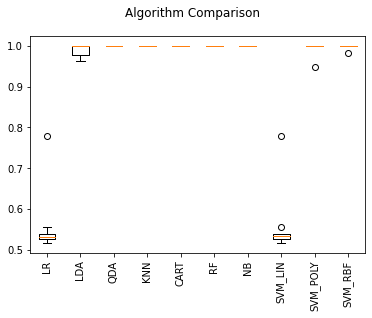

In [16]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_unbalanced)
ax.set_xticklabels(names_unbalanced)
plt.xticks(rotation=90)
plt.show()

#### Training
Here we're training all the models on purpose, in real cases we would choose the best performing model (or k best) using CV then train it (these).

In [17]:
for name, model in models_unbalanced:
	model.fit(X_train, Y_train)

#### Evaluation on Testing Data
##### Plotting Decision Boundaries and Testing Data 

In [18]:
def plot_boundaries(X, Y, models, names):
    nb_models = len(models)
    NB_LIG = int(np.sqrt(nb_models))
    NB_COL = NB_LIG + 1
    fig, axs = plt.subplots(NB_LIG, NB_COL, figsize=(20, 10))
    fig.tight_layout()
    fig.subplots_adjust(top=3, bottom=1)
    for i, model in enumerate(models):
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        x_min, x_max = X["V1"].min() - .05, X["V1"].max() + .05
        y_min, y_max = X["V2"].min() - .05, X["V2"].max() + .05
        h = .01  # step size in the mesh
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z = model[1].predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        axs[i//NB_COL, i%NB_COL].pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

        # Plot also the training points
        axs[i//NB_COL, i%NB_COL].scatter(X["V1"], X["V2"], c=Y, marker="H", edgecolors='k', cmap=plt.cm.Paired)
        axs[i//NB_COL, i%NB_COL].set_xlabel('V1')
        axs[i//NB_COL, i%NB_COL].set_ylabel('V2')

        axs[i//NB_COL, i%NB_COL].set_xlim(xx.min(), xx.max())
        axs[i//NB_COL, i%NB_COL].set_ylim(yy.min(), yy.max())
        axs[i//NB_COL, i%NB_COL].set_title(names[i], fontsize= 30)

    plt.show()

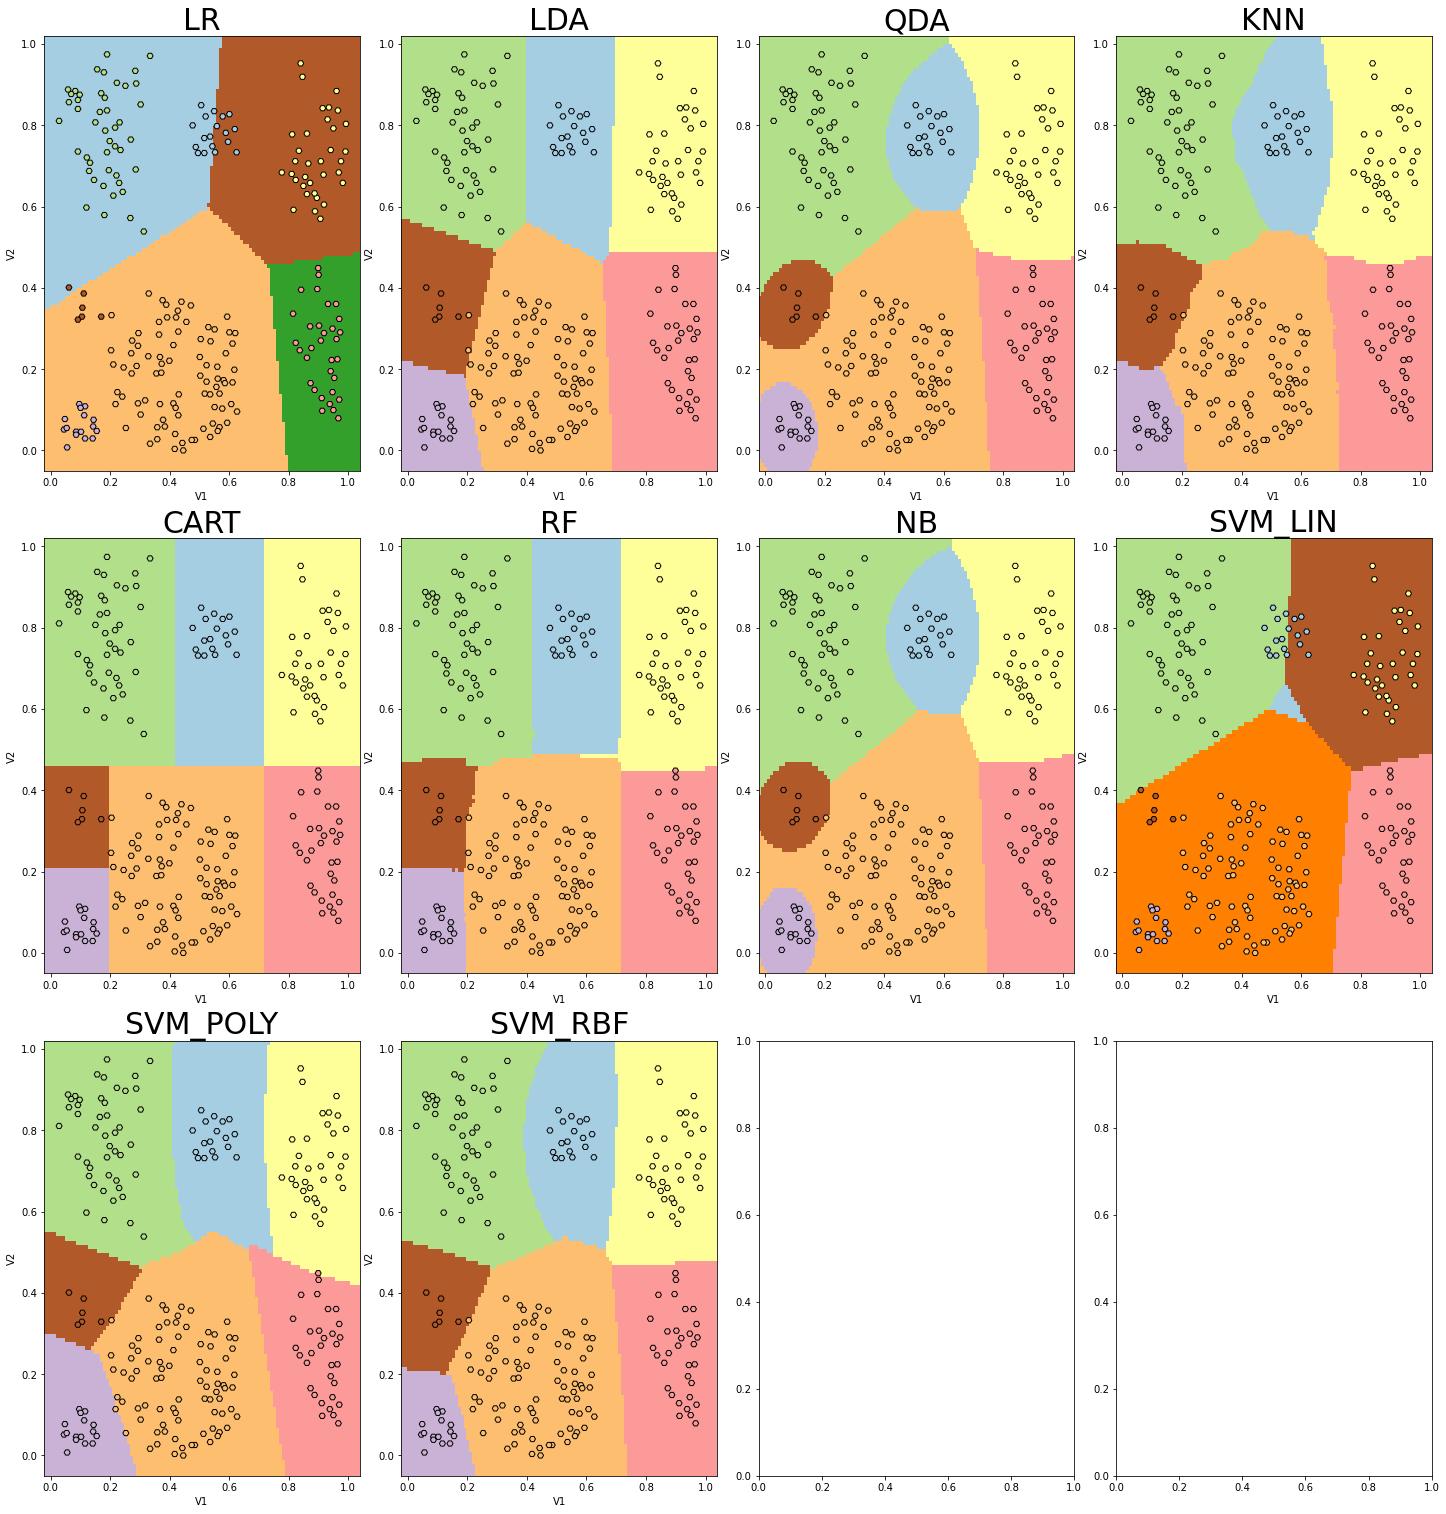

In [19]:
plot_boundaries(X_validation, Y_validation, models_unbalanced, names_unbalanced)

##### Classification Report

In [21]:
from sklearn.metrics import classification_report

for name, model in models_unbalanced:
    pred = model.predict(X_validation)
    accuracy = (pred == Y_validation).sum()/len(X_validation) * 100
    fscore = f1_score(Y_validation, pred, average="macro") * 100

    print("| {} | {:.2f} | {:.4F} |".format(name, accuracy, fscore))
    print(classification_report(Y_validation, pred, digits=4))
    print()
    print()
    print()

| LR | 83.12 | 52.5428 |
              precision    recall  f1-score   support

           1     0.0000    0.0000    0.0000        18
           2     0.8070    1.0000    0.8932        46
           3     1.0000    1.0000    1.0000        32
           4     0.8019    1.0000    0.8901        85
           5     0.0000    0.0000    0.0000        16
           6     0.8095    1.0000    0.8947        34
           7     0.0000    0.0000    0.0000         6

    accuracy                         0.8312       237
   macro avg     0.4883    0.5714    0.5254       237
weighted avg     0.6954    0.8312    0.7560       237




| LDA | 99.16 | 97.7891 |
              precision    recall  f1-score   support

           1     1.0000    1.0000    1.0000        18
           2     1.0000    1.0000    1.0000        46
           3     1.0000    1.0000    1.0000        32
           4     1.0000    0.9765    0.9881        85
           5     1.0000    1.0000    1.0000        16
           6     1.0000 

##### Summarized Testing metrics

In [23]:
for name, model in models_unbalanced:
    pred = model.predict(X_validation)
    accuracy = (pred ==Y_validation).sum()/len(X_validation) * 100
    f1 = f1_score(Y_validation, pred, average="macro") * 100
    print("| {} | {:.2f} | {:.2f} |".format(name, accuracy, f1))

| LR | 83.12 | 52.54 |
| LDA | 99.16 | 97.79 |
| QDA | 100.00 | 100.00 |
| KNN | 99.58 | 98.82 |
| CART | 100.00 | 100.00 |
| RF | 99.58 | 99.57 |
| NB | 99.58 | 98.82 |
| SVM_LIN | 83.12 | 52.54 |
| SVM_POLY | 98.73 | 97.86 |
| SVM_RBF | 99.58 | 98.82 |


|Algorithm| Testing Accuracy (%) | F1-Score (Macro Avg.)|
| :-- | --- | --- |
| LR | 83.12 | 52.54 |
| LDA | 99.16 | 97.79 |
| QDA | 100.00 | 100.00 |
| KNN | 99.58 | 98.82 |
| CART | 100.00 | 100.00 |
| RF | 99.58 | 99.57 |
| NB | 99.58 | 98.82 |
| SVM_LIN | 83.12 | 52.54 |
| SVM_POLY | 98.73 | 97.86 |
| SVM_RBF | 99.58 | 98.82 |

### Balanced CASE

In [24]:
num_folds = 10
seed = 7
scoring = 'f1_macro'
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM_LIN', LinearSVC()))
models.append(('SVM_POLY', SVC(kernel="poly")))
models.append(('SVM_RBF', SVC(kernel="rbf")))
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
	cv_results = cross_val_score(model, X_resampled, y_resampled, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.984557 (0.009261)
LDA: 0.980155 (0.010728)
QDA: 0.998498 (0.003005)
KNN: 0.999235 (0.002295)
CART: 1.000000 (0.000000)
RF: 1.000000 (0.000000)
NB: 0.998498 (0.003005)
SVM_LIN: 0.961829 (0.020011)
SVM_POLY: 0.996891 (0.003823)
SVM_RBF: 0.998498 (0.003005)


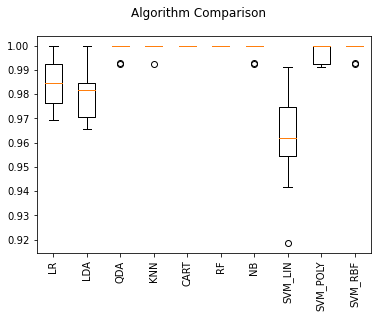

In [25]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=90)
plt.show()

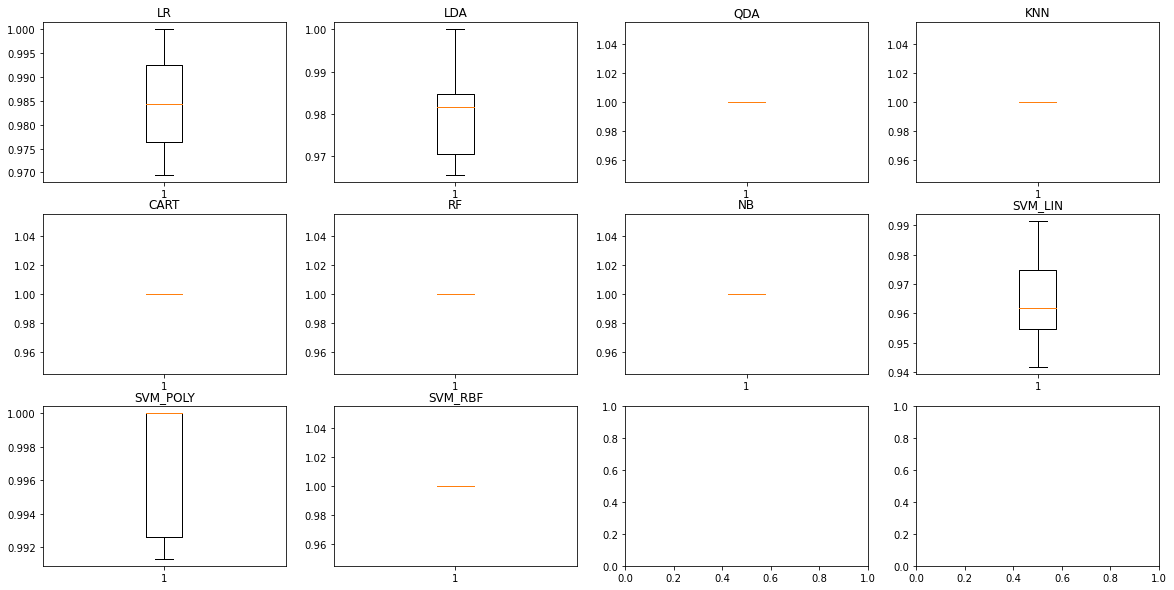

In [26]:
NB_COL = 4
NB_LIG = 3
fig, axs = plt.subplots(NB_LIG, NB_COL, figsize=(20, 10))
for i in range(len(results)):
    axs[i//NB_COL, i%NB_COL].boxplot(results[i], showfliers=False)
    axs[i//NB_COL, i%NB_COL].set_title(names[i])

In [27]:
for name, model in models:
	model.fit(X_resampled, y_resampled)

#### Evaluation on Testing Data
##### Plotting Decision Boundaries and Testing Data 

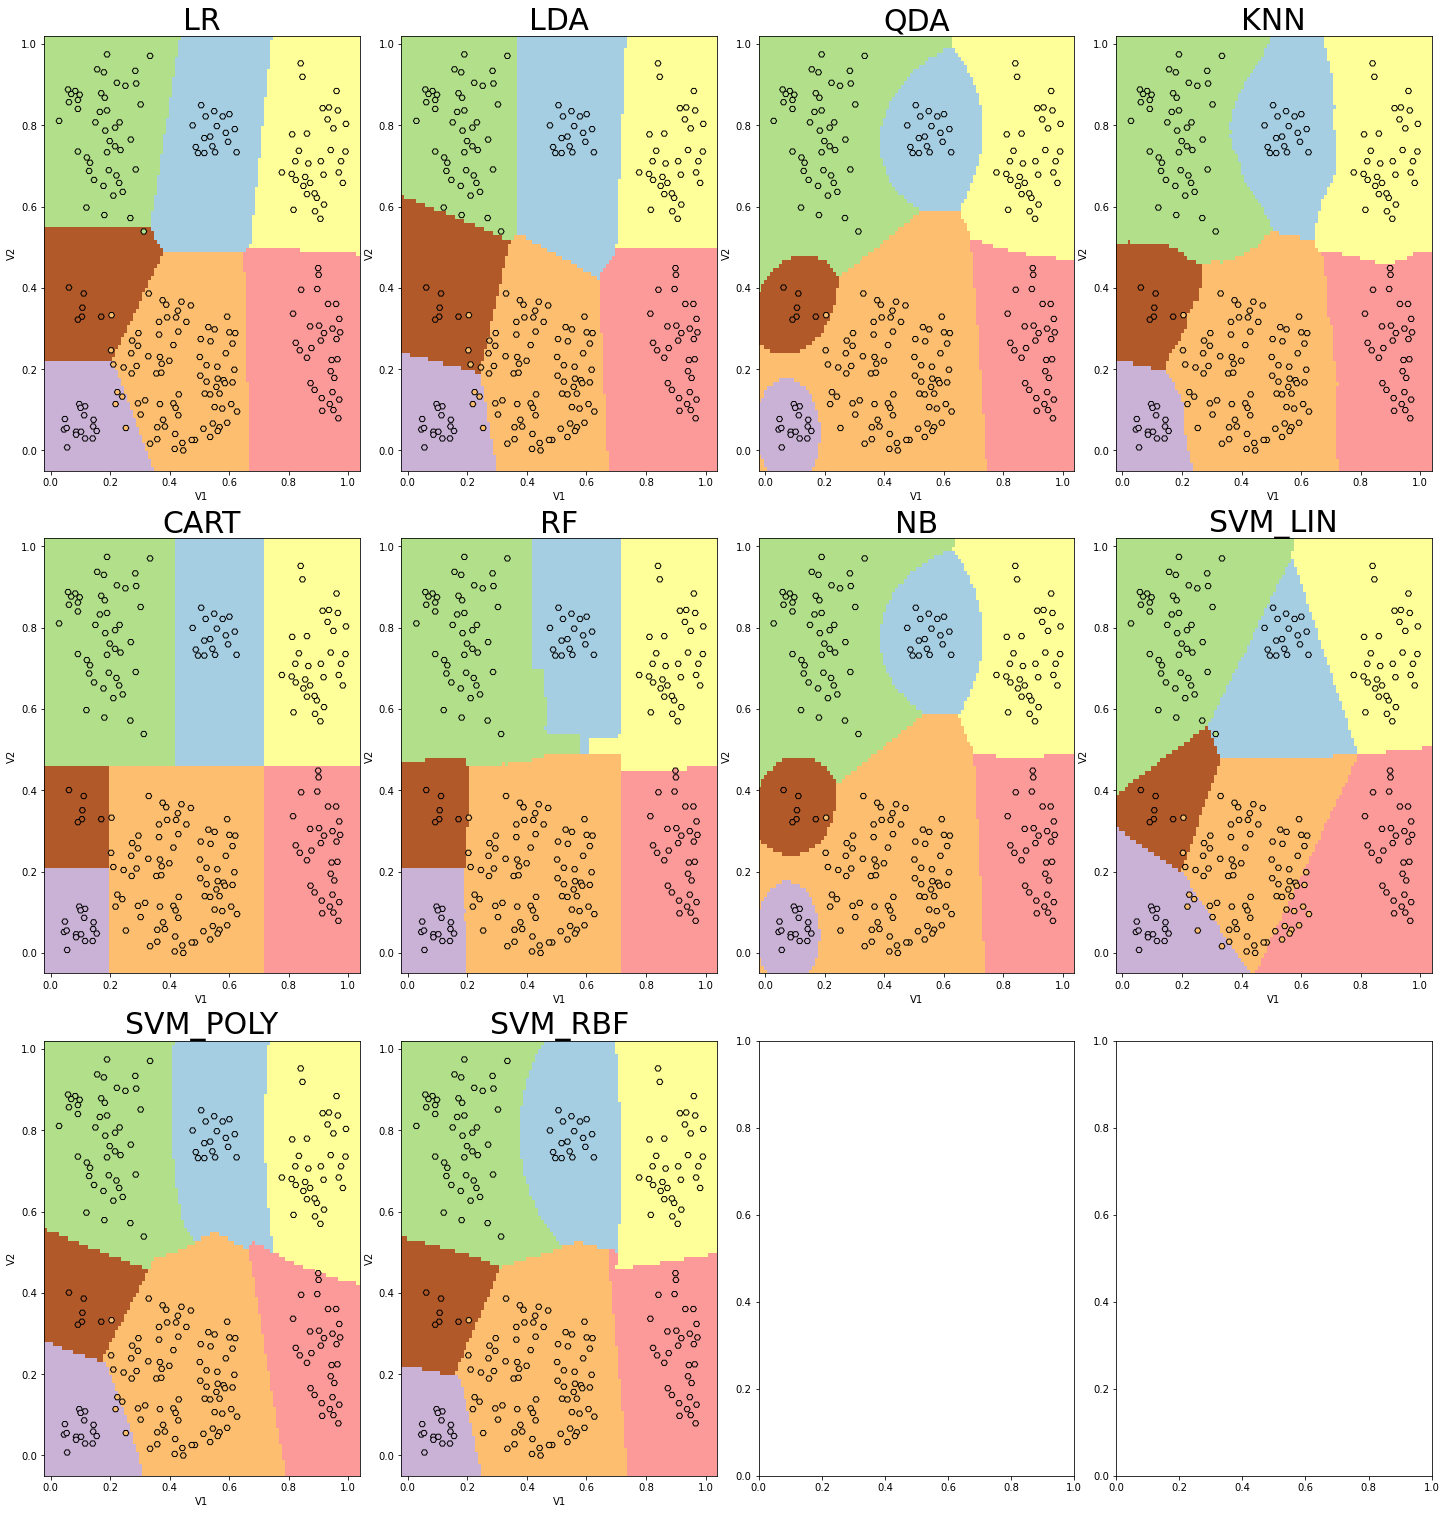

In [28]:
plot_boundaries(X_validation, Y_validation, models, names)

##### Classification Report

In [29]:
for name, model in models:
    pred = model.predict(X_validation)
    accuracy = (pred == Y_validation).sum()/len(X_validation) * 100
    fscore = f1_score(Y_validation, pred, average="macro") * 100

    print("| {} | {:.2f} | {:.4F} |".format(name, accuracy, fscore))
    print(classification_report(Y_validation, pred, digits=4))
    print()
    print()
    print()

| LR | 97.05 | 94.8759 |
              precision    recall  f1-score   support

           1     1.0000    1.0000    1.0000        18
           2     1.0000    0.9783    0.9890        46
           3     1.0000    1.0000    1.0000        32
           4     1.0000    0.9294    0.9634        85
           5     0.8000    1.0000    0.8889        16
           6     1.0000    1.0000    1.0000        34
           7     0.6667    1.0000    0.8000         6

    accuracy                         0.9705       237
   macro avg     0.9238    0.9868    0.9488       237
weighted avg     0.9781    0.9705    0.9722       237




| LDA | 96.62 | 94.1358 |
              precision    recall  f1-score   support

           1     1.0000    1.0000    1.0000        18
           2     1.0000    1.0000    1.0000        46
           3     1.0000    1.0000    1.0000        32
           4     1.0000    0.9059    0.9506        85
           5     0.8000    1.0000    0.8889        16
           6     1.0000 

##### Summarized Testing Metrics

In [30]:
for name, model in models:
    pred = model.predict(X_validation)
    accuracy = (pred ==Y_validation).sum()/len(X_validation) * 100
    f1 = f1_score(Y_validation, pred, average="macro") * 100
    print("| {} | {:.2f} | {:.2f} |".format(name, accuracy,f1))

| LR | 97.05 | 94.88 |
| LDA | 96.62 | 94.14 |
| QDA | 99.58 | 98.82 |
| KNN | 99.58 | 98.82 |
| CART | 100.00 | 100.00 |
| RF | 100.00 | 100.00 |
| NB | 99.58 | 98.82 |
| SVM_LIN | 91.14 | 91.17 |
| SVM_POLY | 97.89 | 96.90 |
| SVM_RBF | 99.58 | 98.82 |


# Summary
## Cross Validation Results
### Imbalanced

|Algorithm| Mean F1 Macro | Variance F1 Macro |
| --- | --- | --- |
| LR  | 0.557658 | 0.074594
| LDA | 0.988581 | 0.014762 |
| QDA | 1.000000 | 0 |
| KNN | 1.000000 |0  |
| CART | 1.000000| 0 |
| RF  | 1.000000 |0  |
| NB | 1.000000  | 0 |
| SVM_LIN | 0.558400 | 0.074531 |
| SVM_POLY | 0.994890 | 0.015331 |
| SVM_RBF | 0.998130 | 0.005610 |

### Balanced

|Algorithm| Mean F1 Macro | Variance F1 Macro |
| ---  | ---       | ---      |
|LR | 0.984557 |0.009261|
|LDA| 0.980155 |0.010728|
|QDA| 0.998498 |0.003005|
|KNN| 0.999235 |0.002295|
|CART| 1.000000 |0.000000|
|RF| 1.000000 |0.000000|
|NB| 0.998498 |0.003005|
|SVM_LIN| 0.961829 |0.020011|
|SVM_POLY| 0.996891 |0.003823|
|SVM_RBF| 0.998498 | 0.003005|



##  Evaluation on Testing Data
### Imbalanced

|Algorithm| Testing Accuracy (%) | F1-Score (Macro Avg.)|
| :-- | --- | --- |
| LR | 83.12 | 52.54 |
| LDA | 99.16 | 97.79 |
| QDA | 100.00 | 100.00 |
| KNN | 99.58 | 98.82 |
| CART | 100.00 | 100.00 |
| RF | 99.58 | 99.57 |
| NB | 99.58 | 98.82 |
| SVM_LIN | 83.12 | 52.54 |
| SVM_POLY | 98.73 | 97.86 |
| SVM_RBF | 99.58 | 98.82 |

### Balanced

|Algorithm| Testing Accuracy (%) | F1-Score (Macro Avg.)|
| :-- | --- | --- |
| LR | 97.05 | 94.88 |
| LDA | 96.62 | 94.14 |
| QDA | 99.58 | 98.82 |
| KNN | 99.58 | 98.82 |
| CART | 100.00 | 100.00 |
| RF | 100.00 | 100.00 |
| NB | 99.58 | 98.82 |
| SVM_LIN | 91.14 | 91.17 |
| SVM_POLY | 97.89 | 96.90 |
| SVM_RBF | 99.58 | 98.82 |

We can see that the best performing models are RF/CART. We can also see from the F1 Scores and from the boundaries how Logistic Regression and Linear SVM fail to correctly classify the imbalanced data.